In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/home/xhding/workspaces/torch-deep-retina')
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import h5py
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from scipy.stats import pearsonr
from fnn.evaluation import *
from fnn.utils import select_model
from fnn.config import get_custom_cfg
from fnn.data import TestDataset, ValidationDataset
from fnn.notebook.utils import *
from torchdeepretina.datas import loadexpt
import pyret

In [25]:
with h5py.File('/home/xhding/tem_stim/21-03-15/naturalscene.h5', 'r') as f:
    single_trial = np.array(f['test']['repeats/firing_rate_10ms'])
single_trial = np.swapaxes(single_trial,1,2)[:,40:6003,[0,1,2,3,4,6]]

In [26]:
single_trial.shape

(15, 5963, 6)

In [27]:
Fano(single_trial)

0.04363716401753369

In [30]:
diagonal_idxs = list(range(0, 6*6, 6+1))

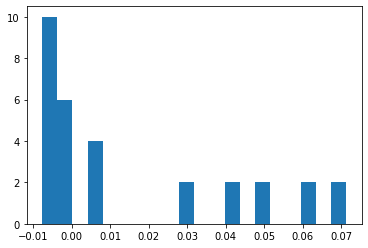

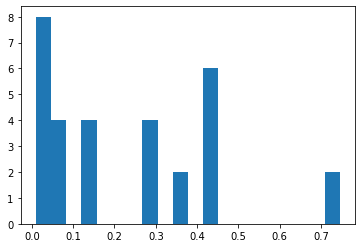

In [35]:
plt.hist(np.delete(noise_corr2(single_trial).flatten(), diagonal_idxs), bins=20)
plt.show()
plt.hist(np.delete(stim_corr2(single_trial).flatten(), diagonal_idxs), bins=20)
plt.show()

In [45]:
device = torch.device('cuda:1')
cfg = get_custom_cfg('bn_cnn_stack_try')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_045_loss_-3.09_pearson_0.6505.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

BN_CNN_Stack(
  (bipolar): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(40, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (5): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (1): Flatten()
    (2): BatchNorm1d(10368, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
    (3): GaussianNoise(std=0.05, trainable=False, adapt=False, momentum=0.95)
    (4): ReLU()
  )
  (amacrine): Sequential(
    (0): Reshape(shape=(-1, 8, 36, 36))
    (1): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Seq

In [52]:
test_data = DataLoader(TestDataset(cfg), batch_size=10000)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 6, device, cfg)
test_pc

0.8487897494644102

In [53]:
train_data = get_data(cfg)
data_distr = get_model_and_distr(train_data, cfg.Data.val_size, cfg.Data.batch_size)
pearson, _,_,_ = pearsonr_batch_eval(model, data_distr.val_sample(500), cfg.Model.n_units, device, cfg)
pearson

MemoryError: Unable to allocate 268. GiB for an array with shape (359990, 40, 50, 50) and data type float64

In [60]:
type(None)

NoneType